In [1]:
from kneed import DataGenerator, KneeLocator
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import scipy.io
import json
import numpy as np
from format_data import *
from utils import *
import pickle

In [2]:
t_pre = 0.2#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)

In [3]:
path = '/auto/data2/eTheremin/ALTAI/ALTAI_20240712_SESSION_01/'

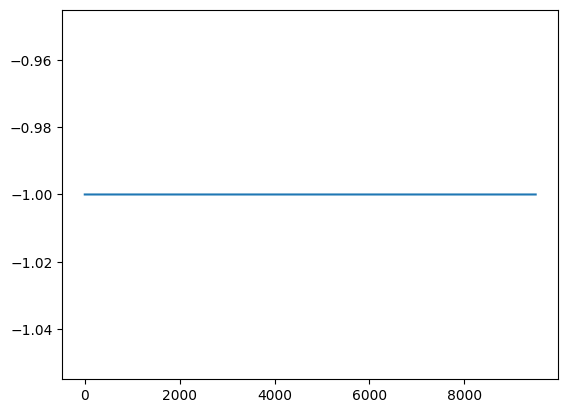

In [4]:
tt_path = path+'headstage_0/tt.pkl'
with open(tt_path, 'rb') as file:
    tt = pickle.load(file)
plt.plot(tt['condition'])

In [5]:
data = np.load(path+'headstage_0/data_0.005.npy', allow_pickle=True)
features = np.load(path+'headstage_0/features_0.005.npy', allow_pickle=True)
gc = np.load(path+'headstage_0/good_clusters.npy', allow_pickle=True)

In [6]:
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tail')

In [10]:
len(tracking)

30

In [12]:
n = int(len(tracking[0])/2)
tracking = np.array(tracking)
first_tr = tracking[:,:n]
second_tr = tracking[:,n:]

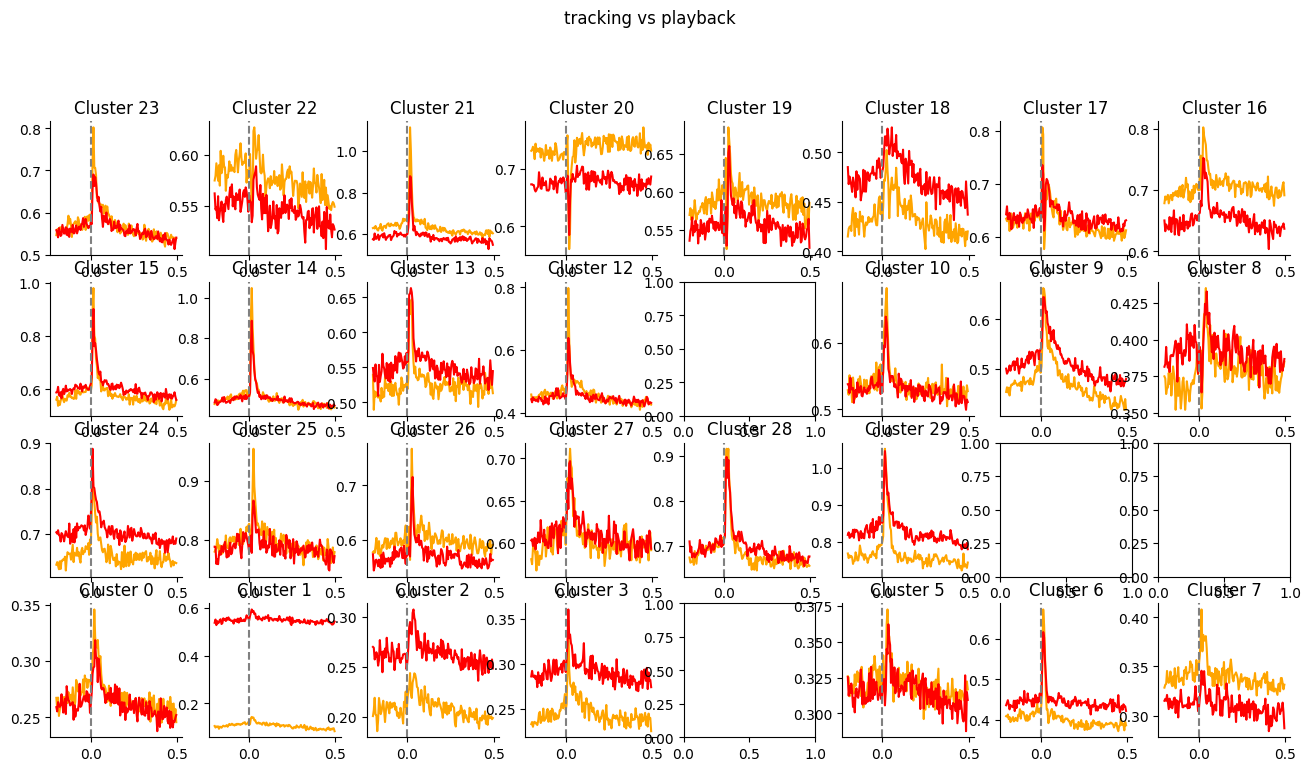

In [14]:
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('tracking vs playback', y=1.02)
plt.subplots_adjust() 
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
psth_bins = np.arange(-t_pre, t_post, bin_width)
for cluster in gc:
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, np.nanmean(first_tr[cluster], axis=0), c = 'orange')
        axes[row, col].plot(psth_bins, np.nanmean(second_tr[cluster], axis=0), c = 'red')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)
#plt.savefig(path+'headstage_0/psth_cluster.png')


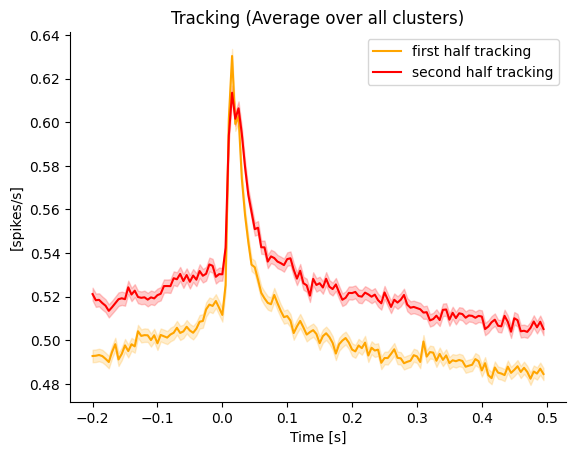

In [15]:
# la moyenne sur tous les clusters
c_tracking = np.nanmean(first_tr, axis=0)
cc_tracking = np.nanmean(second_tr, axis=0)


m_tracking = np.nanmean(c_tracking, axis=0)
mm_tracking = np.nanmean(cc_tracking, axis=0)

sem_tr = get_sem(c_tracking)
sem_pb = get_sem(cc_tracking)

plt.plot(psth_bins, m_tracking, c = 'orange', label = 'first half tracking')
plt.plot(psth_bins, mm_tracking, c = 'red',  label = 'second half tracking')
plt.fill_between(psth_bins, m_tracking - sem_tr, m_tracking + sem_tr, color='orange', alpha=0.2)
plt.fill_between(psth_bins, mm_tracking - sem_pb, mm_tracking + sem_pb, color='red', alpha=0.2)
plt.title('Tracking (Average over all clusters)')
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()